In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [10]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [11]:
# Set features. This will also be used as your x values.
selected_features=df.drop("koi_disposition", axis=1)
X = selected_features
y=df["koi_disposition"]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [44]:
# Scale your data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
rf.score(X_train_scaled, y_train)

1.0

# generates best result

In [47]:
rf.score(X_test_scaled, y_test)

0.8975972540045767

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_scores = []
test_scores = []
for k in estimators:
    rf = RandomForestClassifier(n_estimators=k)
    rf = rf.fit(X_train_scaled, y_train)
    train_score = rf.score(X_train_scaled, y_train)
    test_score = rf.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")   


k: 1, Train/Test Score: 0.936/0.805
k: 2, Train/Test Score: 0.916/0.776
k: 4, Train/Test Score: 0.973/0.839
k: 8, Train/Test Score: 0.992/0.866
k: 16, Train/Test Score: 0.998/0.886
k: 32, Train/Test Score: 0.999/0.895
k: 64, Train/Test Score: 1.000/0.900
k: 100, Train/Test Score: 1.000/0.896
k: 200, Train/Test Score: 1.000/0.896


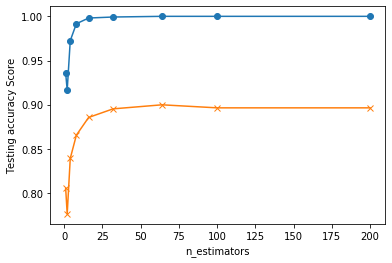

In [35]:
plt.plot(estimators, train_scores, marker='o')
plt.plot(estimators, test_scores, marker="x")
plt.xlabel("n_estimators")
plt.ylabel("Testing accuracy Score")
plt.show()

In [15]:
importances = rf.feature_importances_
sorted(zip(rf.feature_importances_, selected_features), reverse=True)

[(0.1065810053549102, 'koi_fpflag_co'),
 (0.09873297458213538, 'koi_fpflag_nt'),
 (0.06607391195077339, 'koi_fpflag_ss'),
 (0.05394859513626379, 'koi_prad'),
 (0.05179081148034818, 'koi_model_snr'),
 (0.03614134869407979, 'koi_duration_err1'),
 (0.03569050651577158, 'koi_steff_err1'),
 (0.03494481155656362, 'koi_fpflag_ec'),
 (0.034457341945997304, 'koi_duration_err2'),
 (0.028502861031919225, 'koi_prad_err2'),
 (0.027488711261215076, 'koi_prad_err1'),
 (0.02608462391501385, 'koi_steff_err2'),
 (0.02292945543810813, 'koi_time0bk_err2'),
 (0.0228474638812222, 'koi_duration'),
 (0.022550495738227618, 'koi_time0bk_err1'),
 (0.022189110691330623, 'koi_period'),
 (0.022101299240706064, 'koi_depth'),
 (0.020768694748467705, 'koi_insol_err1'),
 (0.018721277120411512, 'koi_period_err2'),
 (0.018310481260186903, 'koi_impact'),
 (0.01772894385745083, 'koi_period_err1'),
 (0.016578678276498643, 'koi_teq'),
 (0.016203380663646193, 'koi_insol'),
 (0.014827251694336492, 'koi_insol_err2'),
 (0.013286

max_depth: 1.0, Train/Test Score: 0.506/0.488
max_depth: 2.0, Train/Test Score: 0.694/0.685
max_depth: 3.0, Train/Test Score: 0.841/0.827
max_depth: 4.0, Train/Test Score: 0.865/0.856
max_depth: 5.0, Train/Test Score: 0.875/0.858
max_depth: 6.0, Train/Test Score: 0.887/0.870
max_depth: 7.0, Train/Test Score: 0.896/0.878
max_depth: 8.0, Train/Test Score: 0.908/0.885
max_depth: 9.0, Train/Test Score: 0.919/0.888
max_depth: 10.0, Train/Test Score: 0.932/0.894
max_depth: 11.0, Train/Test Score: 0.944/0.893
max_depth: 12.0, Train/Test Score: 0.958/0.894
max_depth: 13.0, Train/Test Score: 0.966/0.899
max_depth: 14.0, Train/Test Score: 0.976/0.896
max_depth: 15.0, Train/Test Score: 0.981/0.896
max_depth: 16.0, Train/Test Score: 0.986/0.899
max_depth: 17.0, Train/Test Score: 0.990/0.899
max_depth: 18.0, Train/Test Score: 0.993/0.902
max_depth: 19.0, Train/Test Score: 0.995/0.900
max_depth: 20.0, Train/Test Score: 0.997/0.895
max_depth: 21.0, Train/Test Score: 0.997/0.899
max_depth: 22.0, Train

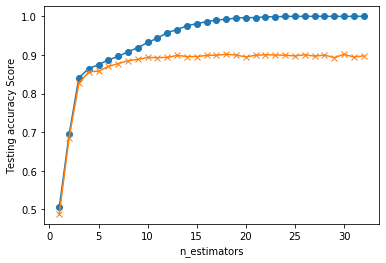

In [39]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_scores = []
test_scores = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf = rf.fit(X_train_scaled, y_train)
    train_score = rf.score(X_train_scaled, y_train)
    test_score = rf.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"max_depth: {max_depth}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")  
    
plt.plot(max_depths, train_scores, marker='o')
plt.plot(max_depths, test_scores, marker="x")
plt.xlabel("n_estimators")
plt.ylabel("Testing accuracy Score")
plt.show()

In [41]:
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Testing Data Score: 0.8930205949656751


In [13]:
predictions = rf.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
4982,FALSE POSITIVE,FALSE POSITIVE
4866,CANDIDATE,CANDIDATE
2934,FALSE POSITIVE,FALSE POSITIVE
5007,FALSE POSITIVE,FALSE POSITIVE
3869,FALSE POSITIVE,FALSE POSITIVE
...,...,...
4006,CANDIDATE,CANDIDATE
6985,CANDIDATE,CANDIDATE
1468,CONFIRMED,CONFIRMED
5138,CANDIDATE,CONFIRMED


# Train the Model



In [ ]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [43]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV


param_grid = {'n_estimators': [32, 64, 100],
              'max_depth': [16,17,18,19,20]}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [45]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] max_depth=16, n_estimators=32 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... max_depth=16, n_estimators=32, score=0.897, total=   0.8s
[CV] max_depth=16, n_estimators=32 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ....... max_depth=16, n_estimators=32, score=0.903, total=   0.7s
[CV] max_depth=16, n_estimators=32 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] ....... max_depth=16, n_estimators=32, score=0.886, total=   0.8s
[CV] max_depth=16, n_estimators=32 ...................................
[CV] ....... max_depth=16, n_estimators=32, score=0.877, total=   0.7s
[CV] max_depth=16, n_estimators=32 ...................................
[CV] ....... max_depth=16, n_estimators=32, score=0.882, total=   0.7s
[CV] max_depth=16, n_estimators=64 ...................................
[CV] ....... max_depth=16, n_estimators=64, score=0.905, total=   1.5s
[CV] max_depth=16, n_estimators=64 ...................................
[CV] ....... max_depth=16, n_estimators=64, score=0.900, total=   1.5s
[CV] max_depth=16, n_estimators=64 ...................................
[CV] ....... max_depth=16, n_estimators=64, score=0.884, total=   1.4s
[CV] max_depth=16, n_estimators=64 ...................................
[CV] ....... max_depth=16, n_estimators=64, score=0.880, total=   1.4s
[CV] max_depth=16, n_estimators=64 ...................................
[CV] .

[CV] ....... max_depth=20, n_estimators=32, score=0.898, total=   0.7s
[CV] max_depth=20, n_estimators=32 ...................................
[CV] ....... max_depth=20, n_estimators=32, score=0.906, total=   0.7s
[CV] max_depth=20, n_estimators=32 ...................................
[CV] ....... max_depth=20, n_estimators=32, score=0.883, total=   0.7s
[CV] max_depth=20, n_estimators=32 ...................................
[CV] ....... max_depth=20, n_estimators=32, score=0.878, total=   0.7s
[CV] max_depth=20, n_estimators=32 ...................................
[CV] ....... max_depth=20, n_estimators=32, score=0.874, total=   0.7s
[CV] max_depth=20, n_estimators=64 ...................................
[CV] ....... max_depth=20, n_estimators=64, score=0.903, total=   1.4s
[CV] max_depth=20, n_estimators=64 ...................................
[CV] ....... max_depth=20, n_estimators=64, score=0.902, total=   1.4s
[CV] max_depth=20, n_estimators=64 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=18,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=64, n_jobs=None,
                                              oob_score=False,
                                              rando

In [46]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 18, 'n_estimators': 100}
0.892997329335827


# Save the Model

In [49]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'BeLacy.sav'
joblib.dump(rf, filename)

['BeLacy.sav']